In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/tmp/ipykernel_32581/2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('../versions/keypoints_xyz_0.9_v3.csv')

In [3]:
df.head()

,label,keypoints
0,A,"[(0.35990989208221436, 0.8417818546295166, -6...."
1,A,"[(0.6427100896835327, 0.5379325151443481, -4.7..."
2,A,"[(0.7046040892601013, 0.8876957893371582, -3.9..."
3,A,"[(0.6484864950180054, 0.902927041053772, -6.27..."
4,A,"[(0.6400114893913269, 0.5368986129760742, -5.1..."


In [4]:
df['keypoints'] = df['keypoints'].apply(eval)
df['keypoints'] = df['keypoints'].apply(lambda x: [list(val[:2]) for val in x])
df.head()

,label,keypoints
0,A,"[[0.35990989208221436, 0.8417818546295166], [0..."
1,A,"[[0.6427100896835327, 0.5379325151443481], [0...."
2,A,"[[0.7046040892601013, 0.8876957893371582], [0...."
3,A,"[[0.6484864950180054, 0.902927041053772], [0.7..."
4,A,"[[0.6400114893913269, 0.5368986129760742], [0...."


In [5]:
# def calculate_angles_from_wrist(hand_landmarks):
#     wrist = np.array([hand_landmarks[0][0], hand_landmarks[0][1]])
#     angles = []

#     for i in range(1, len(hand_landmarks)):  # Skip the wrist itself
#         keypoint = np.array([hand_landmarks[i][0], hand_landmarks[i][1]])
#         vector = keypoint - wrist
#         angle_rad = np.arctan2(vector[1], vector[0])  # Calculate angle in radians
#         angle_deg = np.degrees(angle_rad)  # Convert to degrees
#         angles.append(angle_deg)

#     return angles

In [6]:
def calculate_features_from_wrist(hand_landmarks):

    wrist = np.array([hand_landmarks[0][0], hand_landmarks[0][1]])
    angles = []
    distances = []

    # Calculate angles based on 2D projection and distances in 3D
    for i in range(1, len(hand_landmarks)):
        keypoint = np.array([hand_landmarks[i][0], hand_landmarks[i][1]])

        # Angle calculation remains based on 2D projection
        vector_2d = keypoint[:2] - wrist[:2]
        angle_rad = np.arctan2(vector_2d[1], vector_2d[0])
        angle_deg = np.degrees(angle_rad)
        angles.append(angle_deg)
        
        # Distance calculation now includes Z coordinate for 3D distance
        distance = np.linalg.norm(keypoint - wrist)
        distances.append(distance)

    # Calculate specific distances between keypoints in 3D
    specific_keypoints_pairs = [(4, 8), (8, 12), (12, 16), (16, 20), (4,17), (3, 5), (4,20), (4,12), (4,16)]
    for pair in specific_keypoints_pairs:
        point_a = np.array([hand_landmarks[pair[0]][0], hand_landmarks[pair[0]][1]])
        point_b = np.array([hand_landmarks[pair[1]][0], hand_landmarks[pair[1]][1]])
        specific_distance = np.linalg.norm(point_a - point_b)
        distances.append(specific_distance)

    return {'angles': angles, 'distances': distances}

In [7]:
# joint_list = [[4,2,1], [8,6,5], [12,10,9], [16,14,13], [20,18,17]]

In [8]:
# def calculate_angle(a, b, c):
#     a = np.array(a)  # Coordonnées du premier point
#     b = np.array(b)  # Coordonnées du point de pivot
#     c = np.array(c)  # Coordonnées du troisième point
#     # Vecteurs de a à b et de c à b
#     ab = a - b
#     cb = c - b
#     # Produit scalaire des vecteurs ab et cb
#     dot_product = np.dot(ab, cb)
#     # Normes (longueurs) des vecteurs ab et cb
#     norm_ab = np.linalg.norm(ab)
#     norm_cb = np.linalg.norm(cb)
#     # Calcul de l'angle en radians entre les deux vecteurs
#     angle = np.arccos(dot_product / (norm_ab * norm_cb))
#     # Conversion de l'angle en degrés
#     angle_deg = np.degrees(angle)
#     return angle_deg

In [9]:
# def draw_finger_angles(keypoints):
#     list_angles = []
#     for joint in joint_list:
#         a = np.array([keypoints[joint[0]][0], keypoints[joint[0]][1]])
#         b = np.array([keypoints[joint[1]][0], keypoints[joint[1]][1]])
#         c = np.array([keypoints[joint[2]][0], keypoints[joint[2]][1]])
#         radians = np.arctan2(c[1] - b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
#         angle = np.abs(radians * 180.0 / np.pi)
#         if angle > 180.0:
#             angle = 360 - angle
#         list_angles.append(angle)
#     return list_angles

In [10]:
# def draw_finger_angles(keypoints):
#     list_angles = []
#     for joint in joint_list:
#         a = keypoints[joint[0]]
#         b = keypoints[joint[1]]
#         # Calcul de la différence en x et y entre les points a et b
#         delta_x = b['x'] - a['x']
#         delta_y = b['y'] - a['y']
#         # Calcul de l'angle en radians par rapport à l'horizontale
#         radians = np.arctan2(delta_y, delta_x)
#         # Conversion de l'angle en degrés
#         angle = np.abs(radians * 180.0 / np.pi)
#         list_angles.append(angle)
#     return list_angles

def draw_finger_angles(keypoints):
    list_angles = []
    # Le point a est le centre du poignet, toujours le même pour chaque angle calculé
    a = keypoints[0]  # Centre du poignet

    for i in range(1, 21):  # Parcourir les joints de 1 à 20
        b = keypoints[i]  # Le joint actuel à comparer avec le centre du poignet
        
        # Calcul de la différence en x et y entre les points a (centre du poignet) et b (joint actuel)
        delta_x = b[0] - a[0]
        delta_y = b[1] - a[1]
        
        # Calcul de l'angle en radians par rapport à l'horizontale
        radians = np.arctan2(delta_y, delta_x)
        
        # Conversion de l'angle en degrés
        angle = radians * 180.0 / np.pi
        # Normalisation de l'angle pour qu'il soit entre 0 et 360 degrés
        if angle < 0:
            angle += 360
            
        list_angles.append(angle)
        
    return list_angles


In [11]:
all_angles = []
all_distances = []

for _, row in df.iterrows():
    keypoints = row['keypoints']
    results = calculate_features_from_wrist(keypoints)
    all_distances.append(results['distances'])
    all_angles.append(results['angles'])
df['angles'] = all_angles
df['distances'] = all_distances

In [12]:
df.head()

,label,keypoints,angles,distances
0,A,"[[0.35990989208221436, 0.8417818546295166], [0...","[-21.16770147284092, -36.55034907607458, -48.3...","[0.13774853490761638, 0.3025062401131824, 0.41..."
1,A,"[[0.6427100896835327, 0.5379325151443481], [0....","[-32.26800840226819, -47.04803453461477, -56.2...","[0.08799657030755074, 0.1824514420364143, 0.24..."
2,A,"[[0.7046040892601013, 0.8876957893371582], [0....","[-20.48780649868403, -38.89946110703061, -52.6...","[0.08874076419023884, 0.18867870347704987, 0.2..."
3,A,"[[0.6484864950180054, 0.902927041053772], [0.7...","[-23.654296726965047, -41.70297878277766, -53....","[0.12992050573943845, 0.29392732185546455, 0.4..."
4,A,"[[0.6400114893913269, 0.5368986129760742], [0....","[-33.18573918082317, -48.48842040858511, -58.1...","[0.08765936341261005, 0.18088559983990274, 0.2..."


In [13]:
# test = df.iloc[0]['angles']
# len(test)

In [14]:
# for i in range(20):
#     df[f'angle_{i}'] = [angles[i] for angles in all_angles]

In [15]:
# df.head()

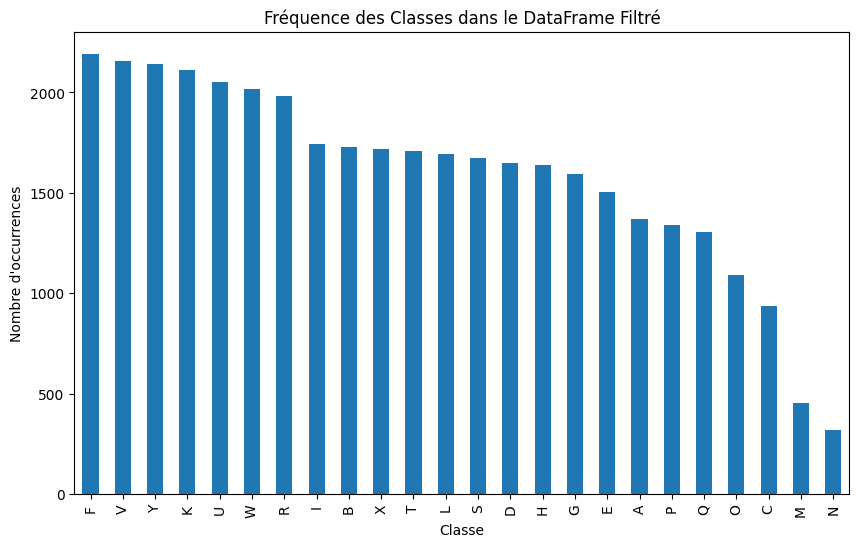

In [16]:
class_counts_filtered = df['label'].value_counts()

plt.figure(figsize=(10, 6))
class_counts_filtered.plot(kind='bar')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'occurrences')
plt.title('Fréquence des Classes dans le DataFrame Filtré')
plt.show()

In [17]:
seuil_bas = 100
seuil_haut = 300

classes_to_keep = class_counts_filtered[class_counts_filtered >= seuil_bas].index
df_filtered = pd.DataFrame(columns=df.columns)
for classe in classes_to_keep:
    df_classe = df[df['label'] == classe]
    if len(df_classe) > seuil_haut:
        df_classe = df_classe.head(seuil_haut)
    df_filtered = pd.concat([df_filtered, df_classe], ignore_index=True)

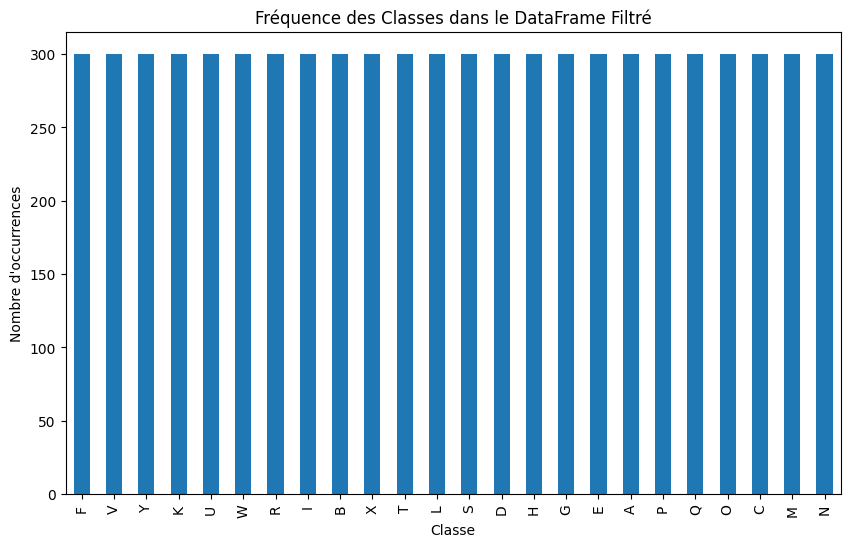

In [18]:
class_counts_filtered = df_filtered['label'].value_counts()

plt.figure(figsize=(10, 6))
class_counts_filtered.plot(kind='bar')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'occurrences')
plt.title('Fréquence des Classes dans le DataFrame Filtré')
plt.show()

In [19]:
df_filtered.head()

,label,keypoints,angles,distances
0,F,"[[0.7513758540153503, 0.8790234327316284], [0....","[-15.856048007845105, -24.800198263246482, -33...","[0.0895956561781202, 0.17508029997509902, 0.24..."
1,F,"[[0.5941231846809387, 0.8328999280929565], [0....","[-48.480431630061496, -54.51094178522262, -62....","[0.1520851527429839, 0.2769611098111988, 0.374..."
2,F,"[[0.41536805033683777, 0.9190069437026978], [0...","[-40.83810247743809, -49.86241040910176, -62.2...","[0.12179503377937632, 0.24671049214592788, 0.3..."
3,F,"[[0.45164239406585693, 0.7461936473846436], [0...","[-46.04579614935236, -53.89371813225617, -60.4...","[0.11912097791679535, 0.23277235222951467, 0.3..."
4,F,"[[0.6129147410392761, 0.8815302848815918], [0....","[-38.53564779332348, -45.80871874133772, -55.5...","[0.15721181629752068, 0.3018262411148423, 0.41..."


In [20]:
# df_filtered = df_filtered.drop(columns=['keypoints'])
# df_filtered.head()

In [21]:
angle_columns = df_filtered['angles'].apply(pd.Series)
distance_columns = df_filtered['distances'].apply(pd.Series)

# Renommage des colonnes
angle_columns.columns = [f'angle_{i}' for i in angle_columns.columns]
distance_columns.columns = [f'dist_{i}' for i in distance_columns.columns]

# Concaténation des nouvelles colonnes de angles et distances au DataFrame original
# Ici, on peut choisir de retirer les colonnes originales 'angles' et 'distances', ou de les laisser
df = pd.concat([df_filtered.drop(['angles', 'distances', 'keypoints'], axis=1), angle_columns, distance_columns], axis=1)
df.head()

,label,angle_0,angle_1,angle_2,angle_3,angle_4,angle_5,angle_6,angle_7,angle_8,...,dist_19,dist_20,dist_21,dist_22,dist_23,dist_24,dist_25,dist_26,dist_27,dist_28
0,F,-15.856048,-24.800198,-33.545268,-41.190580,-64.912251,-60.278287,-53.703412,-46.684249,-79.761742,...,0.367522,0.032991,0.117345,0.137051,0.152475,0.298836,0.125923,0.343929,0.132575,0.259456
1,F,-48.480432,-54.510942,-62.646003,-69.467139,-89.717462,-84.334754,-77.849801,-71.625223,-102.876015,...,0.552351,0.027900,0.198578,0.169391,0.212452,0.416602,0.172874,0.463395,0.224414,0.365920
2,F,-40.838102,-49.862410,-62.285103,-73.106758,-79.505647,-79.132209,-77.467724,-75.239287,-95.016420,...,0.474714,0.016565,0.218382,0.152965,0.177198,0.303697,0.099002,0.356250,0.220980,0.322450
3,F,-46.045796,-53.893718,-60.452367,-65.140842,-94.251739,-86.074721,-76.974049,-68.630777,-105.174798,...,0.508471,0.026365,0.178345,0.153369,0.185867,0.372135,0.180336,0.445524,0.204535,0.333109
4,F,-38.535648,-45.808719,-55.595987,-63.375436,-84.419173,-79.048081,-72.520559,-65.953231,-99.171667,...,0.634722,0.030909,0.239179,0.213991,0.251486,0.484773,0.201173,0.561130,0.269196,0.452597


In [22]:
# angles = df_filtered.iloc[0][1:]  # Get the angles for the first row, excluding the label and other columns

# fig = plt.figure(figsize=(8, 6))
# ax = fig.add_subplot(111, projection='3d')

# x = range(len(angles))
# y = [0] * len(angles)
# z = angles

# ax.plot(x, y, z)
# ax.set_xlabel('Angle Index')
# ax.set_ylabel('Y')
# ax.set_zlabel('Angle Value')
# ax.set_title('3D Plot of Angles for First Row')

# plt.show()

In [23]:
# keypoints_indices = [0, 4, 8, 12, 16, 20]
# for i, index in enumerate(keypoints_indices):
#     df_filtered[f'x_{index}'] = df_filtered['keypoints'].apply(lambda x: x[i][0] if isinstance(x, list) and len(x) > i and isinstance(x[i], tuple) else None)
#     df_filtered[f'y_{index}'] = df_filtered['keypoints'].apply(lambda x: x[i][1] if isinstance(x, list) and len(x) > i and isinstance(x[i], tuple) else None)
# df_filtered = df_filtered.drop(columns=['keypoints'])
# df_filtered.head()

In [24]:
X = df.drop(columns=['label'])
y = df['label']

In [25]:
X.head()

,angle_0,angle_1,angle_2,angle_3,angle_4,angle_5,angle_6,angle_7,angle_8,angle_9,...,dist_19,dist_20,dist_21,dist_22,dist_23,dist_24,dist_25,dist_26,dist_27,dist_28
0,-15.856048,-24.800198,-33.545268,-41.190580,-64.912251,-60.278287,-53.703412,-46.684249,-79.761742,-75.424610,...,0.367522,0.032991,0.117345,0.137051,0.152475,0.298836,0.125923,0.343929,0.132575,0.259456
1,-48.480432,-54.510942,-62.646003,-69.467139,-89.717462,-84.334754,-77.849801,-71.625223,-102.876015,-98.891579,...,0.552351,0.027900,0.198578,0.169391,0.212452,0.416602,0.172874,0.463395,0.224414,0.365920
2,-40.838102,-49.862410,-62.285103,-73.106758,-79.505647,-79.132209,-77.467724,-75.239287,-95.016420,-92.849597,...,0.474714,0.016565,0.218382,0.152965,0.177198,0.303697,0.099002,0.356250,0.220980,0.322450
3,-46.045796,-53.893718,-60.452367,-65.140842,-94.251739,-86.074721,-76.974049,-68.630777,-105.174798,-100.823050,...,0.508471,0.026365,0.178345,0.153369,0.185867,0.372135,0.180336,0.445524,0.204535,0.333109
4,-38.535648,-45.808719,-55.595987,-63.375436,-84.419173,-79.048081,-72.520559,-65.953231,-99.171667,-94.806348,...,0.634722,0.030909,0.239179,0.213991,0.251486,0.484773,0.201173,0.561130,0.269196,0.452597


In [26]:
X.shape, y.shape

((7200, 49), (7200,))

In [27]:
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV

import xgboost as xgb

import joblib

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier()
]

for model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5) 
    print(f"Model: {type(model).__name__}")
    print(f"Cross-validation scores: {scores}")
    print(f"Mean score: {scores.mean()}")
    print(f"Standard deviation: {scores.std()}")

/home/mathieu/projects/asl_web_app/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mathieu/projects/asl_web_app/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Model: LogisticRegression
Cross-validation scores: [0.83940972 0.83854167 0.84809028 0.84722222 0.84461806]
Mean score: 0.843576388888889
Standard deviation: 0.003936036128039817
Model: DecisionTreeClassifier
Cross-validation scores: [0.96180556 0.94965278 0.96354167 0.95399306 0.94444444]
Mean score: 0.9546875
Standard deviation: 0.007208520656953713
Model: RandomForestClassifier
Cross-validation scores: [0.98697917 0.98611111 0.99131944 0.98263889 0.98958333]
Mean score: 0.9873263888888889
Standard deviation: 0.002986918495500923
Model: SVC
Cross-validation scores: [0.77951389 0.78385417 0.77604167 0.76475694 0.78645833]
Mean score: 0.778125
Standard deviation: 0.007579472205883023
Model: KNeighborsClassifier
Cross-validation scores: [0.93576389 0.93576389 0.94357639 0.92881944 0.93923611]
Mean score: 0.9366319444444443
Standard deviation: 0.004848694459641996


In [30]:
model_xgb = xgb.XGBClassifier()
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

scores = cross_val_score(model_xgb, X_train, y_train_encoded, cv=5)

print(f"Model: {type(model_xgb).__name__}")
print(f"Cross-validation scores: {scores}")
print(f"Mean score: {scores.mean()}")
print(f"Standard deviation: {scores.std()}")

Model: XGBClassifier
Cross-validation scores: [0.98350694 0.984375   0.98177083 0.96961806 0.984375  ]
Mean score: 0.9807291666666667
Standard deviation: 0.005636348291926353


In [31]:
# # Define the parameter grid
# param_grid = {
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.1, 0.01, 0.001],
#     'n_estimators': [100, 200, 300],
#     'gamma': [0, 0.1, 0.2],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0]
# }

# # Create an instance of the XGBClassifier model
# model = xgb.XGBClassifier()

# # Create an instance of GridSearchCV
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# # Fit the grid search to the training data
# grid_search.fit(X_train, y_train_encoded)

# # Print the best parameters and best score
# print("Best parameters:", grid_search.best_params_)
# print("Best score:", grid_search.best_score_)


In [32]:
model_xgb = xgb.XGBClassifier()
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

param_grid = {
    'max_depth': 7,
    'learning_rate': 0.1,
    'n_estimators': 300,
    'gamma': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 1.0
}

model_xgb.set_params(**param_grid)
model_xgb.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [33]:
y_pred = model_xgb.predict(X_test)
report = classification_report(y_test_encoded, y_pred)
cm = confusion_matrix(y_test_encoded, y_pred)
print("Rapport de classification :")
print(report)

Rapport de classification :
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        59
           1       1.00      1.00      1.00        64
           2       1.00      1.00      1.00        52
           3       1.00      0.98      0.99        53
           4       1.00      0.98      0.99        60
           5       1.00      1.00      1.00        64
           6       0.98      1.00      0.99        65
           7       1.00      1.00      1.00        57
           8       1.00      0.98      0.99        61
           9       1.00      0.98      0.99        65
          10       1.00      0.98      0.99        56
          11       0.94      0.95      0.94        61
          12       0.92      0.94      0.93        47
          13       0.99      1.00      0.99        78
          14       1.00      0.98      0.99        62
          15       0.98      1.00      0.99        59
          16       1.00      1.00      1.00        46

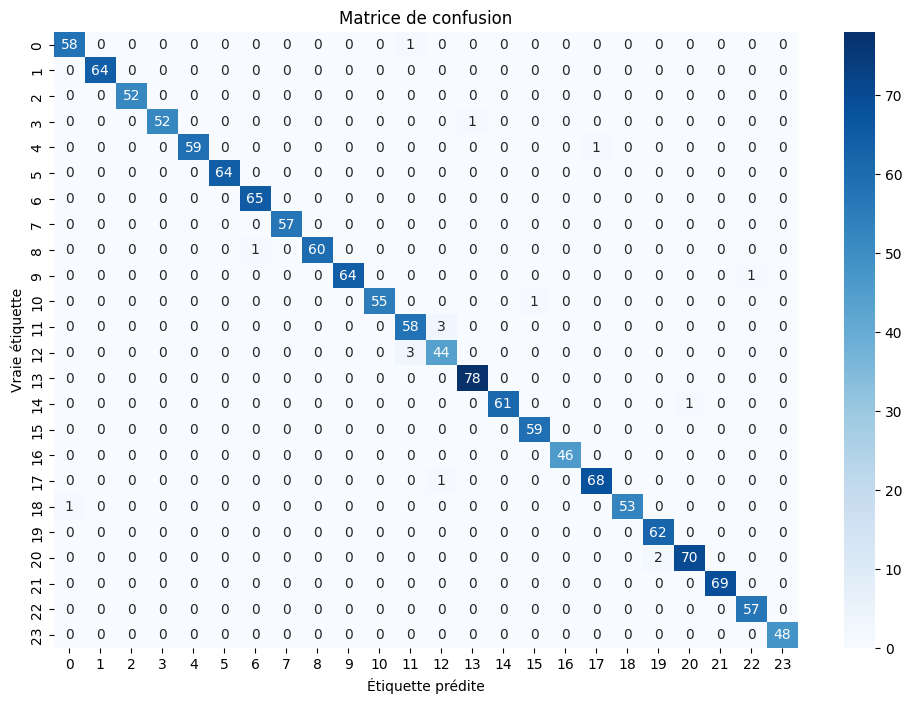

In [34]:
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.ylabel('Vraie étiquette')
plt.xlabel('Étiquette prédite')
plt.title('Matrice de confusion')
plt.show()

In [35]:
joblib.dump(model_xgb, 'model_xgb_xyz_angles_dist_xy.pkl')

['model_xgb_xyz_angles_dist_xy.pkl']